In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\Sohaib Fazal\\Desktop\\dataset_main.csv")

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
analyser = SentimentIntensityAnalyzer()

In [4]:
def sentiment_analyzer(text):
    score = analyser.polarity_scores(text)
    lb = score['compound']
    if lb>=0.05:
        return 1
    elif (lb> - 0.05) and (lb<0.05):
        return 0
    else: return -1


In [5]:
sentiments = []
for i in range(len(df)):
    
    text = df.iloc[i][3]
    res = sentiment_analyzer(text)
    sentiments.append(res)


In [6]:
sentiments

[0,
 -1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 -1,
 0,
 0,
 1,
 -1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 -1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 0,
 -1,
 1,
 0,
 1,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 0,
 1,
 1,
 1,
 -1,
 1,
 1,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 -1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 -1,
 0,
 0,
 1,
 -1,
 -1,
 0,
 1,
 -1,
 0,
 1,
 1,
 0,
 -1,
 1,
 1,
 -1,
 0,
 -1,
 -1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 -1,
 1,
 -1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 -1,
 0,
 1,
 0,
 -1,
 0,
 1,
 1,
 -1,
 0,
 0,
 0,
 1,
 0,
 -1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 -1,
 0,
 0,
 1,
 1,
 -1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 -1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 -1,
 0,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 0,
 1,
 1,
 1,
 1,
 1,


In [7]:
sentiments  = np.array(sentiments)
df_sentiments = pd.DataFrame(data=sentiments)

In [8]:
X_text = df['Text']

In [9]:
X_text

0      International recognition for #Kerala in Susta...
1      Reported deaths in Kerala due to #COVID19 - 1....
2      Relaxing... #bollywood #director #lockdown #co...
3      #mumbai #maharashtra #coronavirus #COVID19 #lo...
4      Lockdown 4.0 Day 13 #Lockdown #stayhome #stays...
                             ...                        
603    Jik ngajaredog atuh lah #coronavirus #COVID19 ...
604    #delhi #lockdown #emptyroads #covid19 #pandemi...
605    "#COVID19: Over 600 #Cases in #India, FM Annou...
606    #lockdown - 2/21 The troops of #coronavirus ar...
607    After around eight months and over three month...
Name: Text, Length: 608, dtype: object

# Lemmatization

We are using the pos tagging to tag the words into 4 categories - Adjective,Verb,Noun,Adverb

In [10]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

''' This function assigns the wordnet tag of pos tag'''
''' The nltk pos tags for adjective is JJ and for verb is VRB and for Noun is NN and for adverb is RB''' 
def nltk_tag_to_wordnet(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None



In [11]:
def lemmatize_my_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged_assign = nltk.pos_tag(nltk.word_tokenize(sentence))  
    
    wordnet_tag = map(lambda x: (x[0], nltk_tag_to_wordnet(x[1])), nltk_tagged_assign)
    lemmatized_sentence = []
    for word, tag in wordnet_tag:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


In [12]:
X_t = []
for i in range(len(X_text)):
    text = X_text[i]
    text = lemmatize_my_sentence(text)
    X_t.append(text)

In [13]:
X_t

['International recognition for # Kerala in Sustainable Development Index with 13th rank . # SDI # KeralaModel # keralafightsCorona # pinarayivijayan # KeralaGovt # COVID19 # CoronaWarriors # coronavirus # lockdownindia # lockdown # staysafe # StayHomeStaySafe # mask # cpim # sfi # communist',
 "Reported death in Kerala due to # COVID19 - 1 . Reported suicide in Kerala due to unavailability of alcohol as a result of lockdown - 3 . Now , I know what the real 'virus ' is.. . # coronavirus # lockdown # alcohol # Kerala # suicide",
 'Relaxing ... # bollywood # director # lockdown # covid19 # coronavirus ... http : //www.instagram.com/p/CAuZTNjhlPk/ ? igshid=hpwzzd39dql9',
 '# mumbai # maharashtra # coronavirus # COVID19 # lockdown # janatacurfew # mumbra # stadium # hospital # Quarantine',
 'Lockdown 4.0 Day 13 # Lockdown # stayhome # staysafe # coronavirus # covid19',
 '# mumbai # maharashtra # coronavirus # COVID19 # lockdown # janatacurfew # mumbra # thane # lockdown # hospital # seal',

# Tokenization and Removing Stop Words 

In [14]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
# Stop words considered are coronavirus,covid19,lockdown,and,the,corona,at,is,you,your,#
# Also words with min freq <=3 are removed
vectorizer = TfidfVectorizer(min_df=3,stop_words={'coronavirus','covid19','lockdown','and','the','corona','at','is','you','your',"#"})
train_text = vectorizer.fit_transform(X_t)

In [15]:
print(vectorizer.get_feature_names())

['10am', '10e6hlny9y3sq', '10pm', '11', '12', '12am', '13', '13m49m96p03vc', '15', '17', '19', '1f73h7cy4a0ro', '1q4bfa5a915eh', '1ramapandey1', '1rbzzr5r302fr', '20', '2020', '21', '21daylockdown', '21dayschallenge', '21dayslockdown', '21daysoflockdown', '21pw91j1cm38', '30', '30th', '3d', '3dprint', '3dprinting', '40', '480p', '500', '600', '76', '80', '8pm', '8th', '9911165309', '9911505309', 'aadharcard', 'aaega', 'aajkal', 'aajtak', 'aatmanirbharbharat', 'aatmnirbhar', 'ab', 'about', 'accept', 'accord', 'across', 'active', 'add', 'address', 'adequate', 'affect', 'afford', 'after', 'against', 'aggof9o14cx6', 'ahmedabad', 'airpollution', 'akurfsk', 'alerts', 'all', 'allowed', 'already', 'also', 'always', 'amateurphotography', 'amazing', 'amid', 'amitshah', 'amp', 'an', 'anand', 'andhrapradesh', 'anjanaomkashyap', 'announces', 'another', 'anxiety', 'any', 'anyone', 'apne', 'appeal', 'appreciate', 'apr', 'april', 'area', 'around', 'arrest', 'art', 'article', 'artisan', 'artist', 'arti

In [16]:
train_text.shape

(608, 1156)

# Dimensionality Reduction using TruncatedSVD

In [17]:
from sklearn.decomposition import TruncatedSVD
tr = TruncatedSVD(200)

In [18]:
p = tr.fit_transform(train_text)

In [19]:
print(sum(tr.explained_variance_ratio_))

0.9553964598700199


In [20]:
p

array([[ 0.0357286 ,  0.14160405, -0.07576332, ..., -0.00254864,
        -0.02346326, -0.02501314],
       [ 0.15800246,  0.13440242, -0.1427293 , ...,  0.02691051,
         0.01465335, -0.00973533],
       [ 0.03542134,  0.5780582 ,  0.60303874, ..., -0.01687971,
         0.05406686, -0.02599788],
       ...,
       [ 0.01232188,  0.07183612, -0.06550628, ...,  0.00073917,
        -0.00410869, -0.00237382],
       [ 0.04227421,  0.30314559,  0.1469648 , ...,  0.0039194 ,
         0.00329824,  0.00307371],
       [ 0.0963705 ,  0.14407604, -0.16457192, ...,  0.00269679,
         0.0042226 , -0.01225368]])

In [21]:
''' The MinMax Scaling is done as the values after dimensionality reduction are very small'''
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
p = min_max_scaler.fit_transform(p)

In [22]:
p

array([[0.03608267, 0.37221004, 0.28140943, ..., 0.46880885, 0.39318957,
        0.41756554],
       [0.15956827, 0.36185131, 0.2105182 , ..., 0.57142268, 0.52595657,
        0.46380345],
       [0.03577237, 1.        , 1.        , ..., 0.41889001, 0.66324088,
        0.41458523],
       ...,
       [0.01244399, 0.27185676, 0.29226771, ..., 0.48026114, 0.460605  ,
        0.48608288],
       [0.04269314, 0.60456929, 0.51719294, ..., 0.49133869, 0.4864047 ,
        0.5025697 ],
       [0.09732553, 0.37576573, 0.18739525, ..., 0.48708003, 0.48962438,
        0.45618173]])

In [23]:
len(p[0])

200

In [24]:
df1 = pd.DataFrame(p)

# Removing outliers

In [25]:
def remove_outliers(df):
    for col in df.columns:
        '''We are using an inter quantile range of 0.05 to 0.95'''
        '''The columns which are having outliers are neglected else they are taken'''
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            ''' The percentiles values contain the range values for 0.05 and 0.95'''
            percentiles_values = df[col].quantile([0.05,0.95]).values
            df[col][df[col] <= percentiles_values[0]] = percentiles_values[0]
            df[col][df[col] >= percentiles_values[1]] = percentiles_values[1]
        else:
            df[col]=df[col]
    return df

final_df=remove_outliers(df1)

In [26]:
df_text = pd.DataFrame(final_df)

In [27]:
df_text

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.036083,0.372210,0.281409,0.348969,0.337789,0.103854,0.399461,0.431004,0.499845,0.410347,...,0.515502,0.387067,0.540271,0.436479,0.390266,0.445579,0.560773,0.468809,0.393190,0.417566
1,0.159568,0.361851,0.210518,0.123946,0.287451,0.067001,0.412410,0.457674,0.526277,0.397700,...,0.430969,0.482404,0.366319,0.521377,0.542442,0.568237,0.356063,0.571423,0.525957,0.463803
2,0.035772,0.674100,0.642772,0.075760,0.674803,0.163320,0.432887,0.558177,0.560857,0.445068,...,0.532308,0.542276,0.415822,0.418477,0.399581,0.461270,0.567357,0.418890,0.638933,0.414585
3,0.007495,0.319651,0.445558,0.219699,0.416234,0.145771,0.500000,0.547883,0.305204,0.588659,...,0.405715,0.353270,0.460821,0.529456,0.394840,0.568949,0.445362,0.409158,0.603445,0.350522
4,0.013378,0.413217,0.289420,0.542735,0.368249,0.092611,0.194511,0.596274,0.741088,0.409666,...,0.473334,0.481167,0.468759,0.415200,0.439748,0.479498,0.465111,0.506672,0.512896,0.487230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0.002546,0.168529,0.361614,0.226493,0.489119,0.222155,0.353236,0.495314,0.473455,0.458065,...,0.480903,0.464393,0.461129,0.414382,0.421709,0.482156,0.483668,0.477686,0.474916,0.493267
604,0.025083,0.609798,0.540080,0.243864,0.310870,0.365595,0.595426,0.590093,0.216559,0.474144,...,0.472073,0.425858,0.462763,0.385624,0.390792,0.456415,0.468294,0.483298,0.463425,0.520259
605,0.012444,0.271857,0.292268,0.152825,0.249618,0.289950,0.470175,0.280024,0.741088,0.469835,...,0.464066,0.459155,0.473936,0.443792,0.401982,0.470382,0.482422,0.480261,0.460605,0.486083
606,0.042693,0.604569,0.517193,0.279505,0.568999,0.138676,0.261338,0.500687,0.453896,0.477163,...,0.484812,0.480314,0.481485,0.424378,0.425240,0.474718,0.461461,0.491339,0.486405,0.502570


In [28]:
if(len(df_text)==len(p)):
  print("No outliers are there")

No outliers are there


In [29]:
df = pd.concat([df,df_text,df_sentiments],axis=1)

In [30]:
df

,Date,Name,Gender,Text,Retweets,State,Corona cases,0,1,2,...,191,192,193,194,195,196,197,198,199,0
0,28/05/2020,Joshi Flabour Welben,0,International recognition for #Kerala in Susta...,0,0,85,0.036083,0.372210,0.281409,...,0.387067,0.540271,0.436479,0.390266,0.445579,0.560773,0.468809,0.393190,0.417566,0
1,28/03/2020,Niranjan Sajith,0,Reported deaths in Kerala due to #COVID19 - 1....,0,0,6,0.159568,0.361851,0.210518,...,0.482404,0.366319,0.521377,0.542442,0.568237,0.356063,0.571423,0.525957,0.463803,-1
2,30/05/2020,Tariq Bhat,0,Relaxing... #bollywood #director #lockdown #co...,0,1,2940,0.035772,0.674100,0.642772,...,0.542276,0.415822,0.418477,0.399581,0.461270,0.567357,0.418890,0.638933,0.414585,1
3,30/05/2020,Mumbra Samachar,2,#mumbai #maharashtra #coronavirus #COVID19 #lo...,0,1,2940,0.007495,0.319651,0.445558,...,0.353270,0.460821,0.529456,0.394840,0.568949,0.445362,0.409158,0.603445,0.350522,0
4,30/05/2020,Rohit Reddy~RR,0,Lockdown 4.0 Day 13 #Lockdown #stayhome #stays...,0,1,2940,0.013378,0.413217,0.289420,...,0.481167,0.468759,0.415200,0.439748,0.479498,0.465111,0.506672,0.512896,0.487230,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,1/4/2020,Agi A. Pratama,0,Jik ngajaredog atuh lah #coronavirus #COVID19 ...,0,29,32,0.002546,0.168529,0.361614,...,0.464393,0.461129,0.414382,0.421709,0.482156,0.483668,0.477686,0.474916,0.493267,0
604,26/03/2020,Anuj narang,0,#delhi #lockdown #emptyroads #covid19 #pandemi...,0,29,1,0.025083,0.609798,0.540080,...,0.425858,0.462763,0.385624,0.390792,0.456415,0.468294,0.483298,0.463425,0.520259,-1
605,26/03/2020,Ghazanfar Abbas,0,"""#COVID19: Over 600 #Cases in #India, FM Annou...",0,29,1,0.012444,0.271857,0.292268,...,0.459155,0.473936,0.443792,0.401982,0.470382,0.482422,0.480261,0.460605,0.486083,0
606,26/03/2020,Kumar Ankit,0,#lockdown - 2/21 The troops of #coronavirus ar...,0,29,1,0.042693,0.604569,0.517193,...,0.480314,0.481485,0.424378,0.425240,0.474718,0.461461,0.491339,0.486405,0.502570,1


In [31]:
state_Col = df[['State']]

In [32]:
state_Col

,State
0,0
1,0
2,1
3,1
4,1
...,...
603,29
604,29
605,29
606,29


In [33]:
df = df.drop(['State'],axis=1)

In [34]:
df

,Date,Name,Gender,Text,Retweets,Corona cases,0,1,2,3,...,191,192,193,194,195,196,197,198,199,0
0,28/05/2020,Joshi Flabour Welben,0,International recognition for #Kerala in Susta...,0,85,0.036083,0.372210,0.281409,0.348969,...,0.387067,0.540271,0.436479,0.390266,0.445579,0.560773,0.468809,0.393190,0.417566,0
1,28/03/2020,Niranjan Sajith,0,Reported deaths in Kerala due to #COVID19 - 1....,0,6,0.159568,0.361851,0.210518,0.123946,...,0.482404,0.366319,0.521377,0.542442,0.568237,0.356063,0.571423,0.525957,0.463803,-1
2,30/05/2020,Tariq Bhat,0,Relaxing... #bollywood #director #lockdown #co...,0,2940,0.035772,0.674100,0.642772,0.075760,...,0.542276,0.415822,0.418477,0.399581,0.461270,0.567357,0.418890,0.638933,0.414585,1
3,30/05/2020,Mumbra Samachar,2,#mumbai #maharashtra #coronavirus #COVID19 #lo...,0,2940,0.007495,0.319651,0.445558,0.219699,...,0.353270,0.460821,0.529456,0.394840,0.568949,0.445362,0.409158,0.603445,0.350522,0
4,30/05/2020,Rohit Reddy~RR,0,Lockdown 4.0 Day 13 #Lockdown #stayhome #stays...,0,2940,0.013378,0.413217,0.289420,0.542735,...,0.481167,0.468759,0.415200,0.439748,0.479498,0.465111,0.506672,0.512896,0.487230,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,1/4/2020,Agi A. Pratama,0,Jik ngajaredog atuh lah #coronavirus #COVID19 ...,0,32,0.002546,0.168529,0.361614,0.226493,...,0.464393,0.461129,0.414382,0.421709,0.482156,0.483668,0.477686,0.474916,0.493267,0
604,26/03/2020,Anuj narang,0,#delhi #lockdown #emptyroads #covid19 #pandemi...,0,1,0.025083,0.609798,0.540080,0.243864,...,0.425858,0.462763,0.385624,0.390792,0.456415,0.468294,0.483298,0.463425,0.520259,-1
605,26/03/2020,Ghazanfar Abbas,0,"""#COVID19: Over 600 #Cases in #India, FM Annou...",0,1,0.012444,0.271857,0.292268,0.152825,...,0.459155,0.473936,0.443792,0.401982,0.470382,0.482422,0.480261,0.460605,0.486083,0
606,26/03/2020,Kumar Ankit,0,#lockdown - 2/21 The troops of #coronavirus ar...,0,1,0.042693,0.604569,0.517193,0.279505,...,0.480314,0.481485,0.424378,0.425240,0.474718,0.461461,0.491339,0.486405,0.502570,1


In [35]:
t = df.to_numpy()
t1 = state_Col.to_numpy()

# OverSampling 

In [36]:
from imblearn.over_sampling import RandomOverSampler
sm1 = RandomOverSampler() 
t,t1 = sm1.fit_resample(t,t1)

Using TensorFlow backend.


In [37]:
t.shape
t1.shape

(2369,)

In [38]:
df = pd.DataFrame(t)
state_df = pd.DataFrame(t1)

In [39]:
df = pd.concat([df,state_df],axis=1)

In [ ]:
df

In [40]:
df.iloc[:,2][2366]

0

In [41]:
df.iloc[1]

0                                             28/03/2020
1                                        Niranjan Sajith
2                                                      0
3      Reported deaths in Kerala due to #COVID19 - 1....
4                                                      0
                             ...                        
203                                             0.571423
204                                             0.525957
205                                             0.463803
206                                                   -1
0                                                      0
Name: 1, Length: 208, dtype: object

In [42]:
df.iloc[2000]

0                                             26/03/2020
1                  Abhishek Kakkar | #StayHome #StaySafe
2                                                      0
3      #curious during #Lockdown state, as a gesture ...
4                                                      0
                             ...                        
203                                             0.475922
204                                             0.638933
205                                             0.382449
206                                                   -1
0                                                     20
Name: 2000, Length: 208, dtype: object

In [43]:
#### Thsi df is balanced by state where stae is last column 

###Total 2369 tweets can be fetched

In [44]:
from datetime import date
d0=date(2020,3,18)
print(df.columns)
d={}
count={}

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            198, 199, 200, 201, 202, 203, 204, 205, 206,   0],
           dtype='int64', length=208)


In [45]:
d0

datetime.date(2020, 3, 18)

In [46]:
col_size = len(df.columns)

In [47]:
col_size

208

The count array is for storing number of tweets on a given day and d array is for storing the mean sentiment for the day.
The formula used is summation of all tweets (sentiments of tweets[i]*number_of_retweets)/number of tweets on day[i] 

In [48]:
for index, row in df.iterrows():
    # print(row)
    row1=list(row)
    dt=row1[0].split('/')
    d1=date(int(dt[2]),int(dt[1]),int(dt[0]))
    delta=(d1-d0).days
    if delta in d:
      
      #row1[col_size-2] contains the sentiment
      #row1[4] contains the number of retweets for the particular tweet
      # d dict contains the mean sentiment for the particular day
      #count dict contains the number of tweets on that particular day
      d[delta]+=(row1[4]+1)*(row1[col_size-2])
      count[delta]+=1
    else:
     
      d[delta]=(row1[4]+1)*(row1[col_size-2])
      count[delta]=1
# print(min1)

0
-1
1
0
0
0
1
1
1
-1
0
0
1
-1
0
0
1
1
1
1
0
0
1
0
1
0
-1
0
1
1
0
1
1
1
1
-1
1
1
-1
0
-1
1
0
-1
1
0
1
-1
0
1
-1
-1
1
0
1
1
1
-1
1
1
0
0
0
0
-1
0
0
0
-1
1
1
1
0
1
1
0
0
0
1
1
0
1
-1
0
0
1
-1
-1
0
1
-1
0
1
1
0
-1
1
1
-1
0
-1
-1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
-1
-1
1
0
0
0
1
0
0
-1
1
-1
0
1
1
0
0
0
1
0
0
1
1
1
0
0
1
1
1
1
1
1
1
-1
0
0
1
0
0
0
0
-1
0
1
0
-1
0
1
1
-1
0
0
0
1
0
-1
1
1
0
1
1
0
1
-1
0
0
1
1
-1
0
1
1
1
0
0
0
0
0
1
1
0
1
0
0
0
1
0
-1
1
0
0
0
0
0
1
1
1
0
0
1
0
1
0
1
-1
0
1
-1
1
1
1
-1
1
1
-1
-1
-1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
-1
1
1
1
0
0
0
1
0
0
1
0
-1
0
0
1
0
1
0
0
1
1
0
0
1
1
1
1
1
1
1
-1
0
0
1
0
0
0
0
1
0
-1
0
0
1
0
0
0
1
0
-1
1
1
0
1
1
1
0
1
-1
-1
0
0
1
1
0
0
1
0
1
1
0
0
0
0
0
1
1
-1
0
-1
1
1
0
0
0
0
1
1
1
0
1
1
1
1
1
1
0
-1
0
0
0
-1
1
-1
-1
-1
0
0
1
0
1
-1
0
1
0
1
0
0
1
1
0
0
0
0
-1
0
0
0
-1
1
0
0
0
0
0
1
1
1
0
1
0
1
1
-1
1
-1
0
1
-1
1
1
-1
1
1
-1
-1
-1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
-1
0
0
0
1
0
0
-1
1
-1
0
1
1
0
1
1
0
0
1
1
1
1
1
1
1
-1
0
0
1
0
0
1
0
0
1
0
0
1
1
0
0
0
1
0
-1

In [49]:
for key in d:
  d[key]/=(count[key])

In [50]:
d

{71: -0.06542056074766354,
 10: 1.123456790123457,
 73: 2.4242424242424243,
 72: 0.4631578947368421,
 70: 0.9736842105263158,
 68: -0.2727272727272727,
 67: 1.375,
 65: 0.0,
 62: 1.5925925925925926,
 61: 0.0,
 59: -1.0,
 58: 0.7272727272727273,
 55: 0.8536585365853658,
 51: 1.0,
 49: -0.1111111111111111,
 48: 12.7,
 46: 0.2413793103448276,
 45: 0.5384615384615384,
 43: 0.18604651162790697,
 42: -0.16666666666666666,
 41: 2.0816326530612246,
 37: 1.0,
 31: 0.38095238095238093,
 30: 0.5,
 28: -0.4,
 27: 0.38636363636363635,
 26: 0.68,
 25: 0.0,
 24: 0.0,
 23: 0.36666666666666664,
 22: -0.007352941176470588,
 21: 0.0,
 20: -1.8333333333333333,
 18: 0.573170731707317,
 16: 1.4375,
 13: -4.716981132075472,
 12: 0.21875,
 11: 0.0,
 9: -0.16129032258064516,
 8: -0.4444444444444444,
 7: 0.5263157894736842,
 6: 0.5,
 4: 0.3181818181818182,
 3: -7.0,
 66: 1.0,
 63: -1.0,
 57: 0.0,
 56: 0.0,
 54: 1.0,
 50: -0.32432432432432434,
 47: 0.8,
 40: 0.8333333333333334,
 39: 1.0,
 36: 1.9090909090909092,

In [51]:
d
max = 0
min = 100000
for key in d:
    if(d[key]>max):
        max = d[key]
    if(d[key]<min):
        min = d[key]

In [52]:
max

12.7

In [53]:
min

-11.411764705882353

In [54]:
range1 = max - min
r1 = min + float(range1)/3
r2 = min + 2*float(range1)/3

In [55]:
x=[]
y=[]
set = d.keys()
for key in sorted(d.keys()):
  y.append(d[key])
  ar=[]
  ar.append(key)
  x.append(ar)

In [56]:
y

[0.0,
 3.0,
 -7.0,
 0.3181818181818182,
 -11.411764705882353,
 0.5,
 0.5263157894736842,
 -0.4444444444444444,
 -0.16129032258064516,
 1.123456790123457,
 0.0,
 0.21875,
 -4.716981132075472,
 0.2953020134228188,
 0.0,
 1.4375,
 1.697674418604651,
 0.573170731707317,
 0.9487179487179487,
 -1.8333333333333333,
 0.0,
 -0.007352941176470588,
 0.36666666666666664,
 0.0,
 0.0,
 0.68,
 0.38636363636363635,
 -0.4,
 12.0,
 0.5,
 0.38095238095238093,
 0.16666666666666666,
 0.8888888888888888,
 0.0,
 -2.3333333333333335,
 1.9090909090909092,
 1.0,
 0.0,
 1.0,
 0.8333333333333334,
 2.0816326530612246,
 -0.16666666666666666,
 0.18604651162790697,
 0.32679738562091504,
 0.5384615384615384,
 0.2413793103448276,
 0.8,
 12.7,
 -0.1111111111111111,
 -0.32432432432432434,
 1.0,
 1.0,
 0.8536585365853658,
 0.0,
 0.0,
 0.7272727272727273,
 -1.0,
 0.044444444444444446,
 0.0,
 1.5925925925925926,
 -1.0,
 0.0,
 1.0,
 1.375,
 -0.2727272727272727,
 0.9736842105263158,
 -0.06542056074766354,
 0.4631578947368421,

In [57]:
x

[[0],
 [1],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [65],
 [66],
 [67],
 [68],
 [70],
 [71],
 [72],
 [73]]

# x represents the day and y has the corresponding mean sentiment 

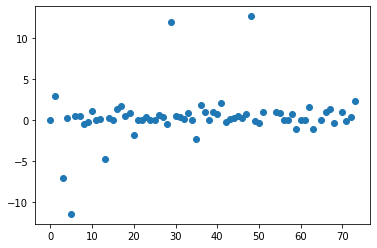

In [58]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

# Removing outliers from our points

In [59]:
lower_bound = 0.05
upper_bound = 0.95
data_points = pd.DataFrame(y)
end_points = data_points[0].quantile([lower_bound,upper_bound])
indexes = (end_points.loc[lower_bound]<data_points[0].values) & (data_points[0].values<end_points.loc[upper_bound])

In [60]:
indexes

array([ True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False])

In [61]:
x1 = []
y1 = []
for i in range(len(indexes)):
    if(indexes[i]==True):
        x1.append(x[i])
        y1.append(y[i])

In [62]:
x1

[[0],
 [4],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [30],
 [31],
 [32],
 [33],
 [34],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [49],
 [50],
 [51],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [65],
 [66],
 [67],
 [68],
 [70],
 [71],
 [72]]

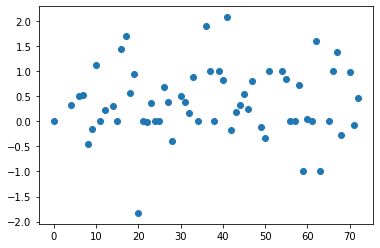

In [63]:
plt.scatter(x1,y1)

Now no outlier is present in the graph.

# Training and testing on various ML models 

The models used are:
1) Linear
2) Lasso
3) Ridge
4) Elastic Net
5) Bayesian Ridge
6) SVR
7) Decision Tree
8) Random Forest

In [64]:
x1 = []
y1 = []
for i in range(len(indexes)):
    if(indexes[i]==True):
        x1.append(x[i])
        y1.append(y[i])

In [65]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(x1,y1,test_size=0.2)

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,BayesianRidge
alphas = [0.01,0.1,1,5]
max1 = 0
best = 0.1
for alpha in alphas:
    reg = LinearRegression(alpha).fit(X_train, y_train)
    a = reg.score(X_valid,y_valid)
    if(a>max):
        best = alpha
        max1 = a

reg = LinearRegression(best).fit(X_train,y_train)

In [68]:
max2 = 0
best = 0.1
for alpha in alphas:
    reg = Lasso(alpha).fit(X_train, y_train)
    a = reg.score(X_valid,y_valid)
    if(a>max):
        best = alpha
        max2 = a

las = Lasso(best).fit(X_train,y_train)


In [69]:
max3 = 0
best = 0.1
for alpha in alphas:
    reg = Ridge(alpha).fit(X_train, y_train)
    a = reg.score(X_valid,y_valid)
    if(a>max):
        best = alpha
        max3 = a

rid = Ridge(best).fit(X_train,y_train)


In [70]:
max4 = 0
best = 0.1
for alpha in alphas:
    reg = ElasticNet(alpha).fit(X_train, y_train)
    a = reg.score(X_valid,y_valid)
    if(a>max):
        best = alpha
        max4 = a

ela = ElasticNet(best).fit(X_train,y_train)

In [71]:
max5 = 0
best = 1
for alpha in alphas:
    if alpha>=1:
        reg = BayesianRidge(alpha).fit(X_train, y_train)
        a = reg.score(X_valid,y_valid)
        if(a>max):
            best = alpha
            max5 = a

br = BayesianRidge(best).fit(X_train,y_train)

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
dt = DecisionTreeRegressor(max_depth=5)
rf = RandomForestRegressor(max_depth=5)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

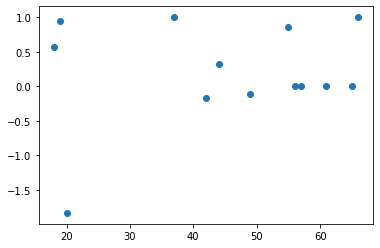

In [73]:
plt.scatter(X_valid,y_valid)

In [74]:
from sklearn.svm import SVR
clf = SVR()
clf.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [75]:
x_test=[]
for i in range(60,200):
  i1 = i
  x_test.append([i1])
    
y_pred=reg.predict(x_test)
y_pred1=las.predict(x_test)
y_pred2 = rid.predict(x_test)
y_pred3 = ela.predict(x_test)
y_pred4 = br.predict(x_test)
y_pred5 = clf.predict(x_test)
y_pred6 = dt.predict(x_test)
y_pred7 = rf.predict(x_test)
#y_pred8 = xgb_reg.predict(x_test)
#plt.plot(x_test,y_pred)

Model score is:  0.0010871567703272245
R2 score of Linear regreesion is:  -0.09915160120150901
MSE of validation set for lin Reg:  0.5875265564396571


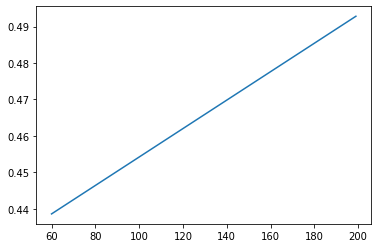

In [76]:
plt.plot(x_test,y_pred)
pred0 = reg.predict(X_valid)
print('Model score is: ',reg.score(X_train,y_train))
print('R2 score of Linear regreesion is: ',reg.score(X_valid,y_valid))
print('MSE of validation set for lin Reg: ',mean_squared_error(pred0,y_valid))

Model score is:  0.0026043841252526567
R2 score of lasso is:  -0.10224261489844233
MSE of validation set for lasso:  0.5891787876980948


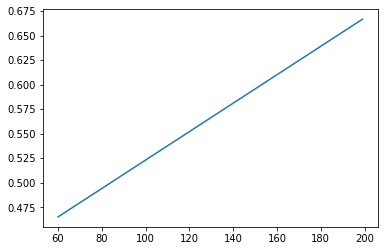

In [77]:
plt.plot(x_test,y_pred1)
pred1 = las.predict(X_valid)
print('Model score is: ',las.score(X_train,y_train))
print('R2 score of lasso is: ',las.score(X_valid,y_valid))
print('MSE of validation set for lasso: ',mean_squared_error(pred1,y_valid))

Model score is:  0.0026578440662492486
R2 score of ridge is:  -0.10316747115731961
MSE of validation set for Ridge:  0.5896731486328247


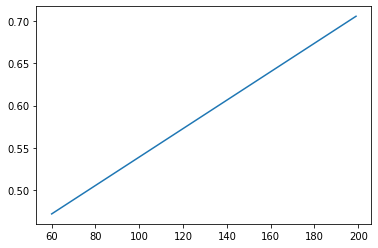

In [78]:
plt.plot(x_test,y_pred2)
pred2 = rid.predict(X_valid)
print('Model score is: ',rid.score(X_train,y_train))
print('R2 score of ridge is: ',rid.score(X_valid,y_valid))
print('MSE of validation set for Ridge: ',mean_squared_error(pred2,y_valid))

Model score is:  0.0026444371327513094
R2 score for Elastic is:  -0.10269392845110126
MSE of validation set for Elastic Reg is:  0.5894200271205534


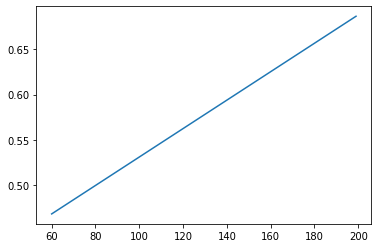

In [79]:
plt.plot(x_test,y_pred3)
pred3 = ela.predict(X_valid)
print('Model score is: ',ela.score(X_train,y_train))
print('R2 score for Elastic is: ',ela.score(X_valid,y_valid))
print('MSE of validation set for Elastic Reg is: ',mean_squared_error(pred3,y_valid))

Model score is:  0.0008519670811809599
R2 score for bayesian ridge is:  -0.09895617689161607
MSE For validation set for bayesian ridge is:  0.5874220968076004


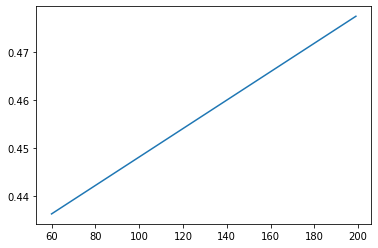

In [80]:
plt.plot(x_test,y_pred4)
pred4 = br.predict(X_valid)
print('Model score is: ',br.score(X_train,y_train))
print('R2 score for bayesian ridge is: ',br.score(X_valid,y_valid))
print('MSE For validation set for bayesian ridge is: ',mean_squared_error(pred4,y_valid))

Model score is:  0.02482259779401097
R2 score for SVR is : -0.14031467407430354
MSE for validation set for SVM is:  0.6095293433445673


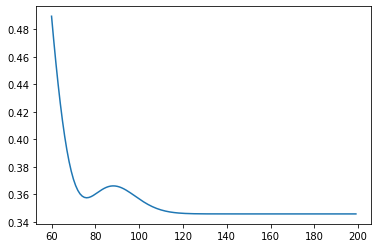

In [81]:
plt.plot(x_test,y_pred5)
pred5 = clf.predict(X_valid)
print('Model score is: ',clf.score(X_train,y_train))
print('R2 score for SVR is :',clf.score(X_valid,y_valid))
print('MSE for validation set for SVM is: ',mean_squared_error(pred5,y_valid))

Model score is:  0.4544485435374448
R2 score for decision tree is:  -0.32651908349868775
MSE for validation set for Decision Tree is:  0.7090606867401468


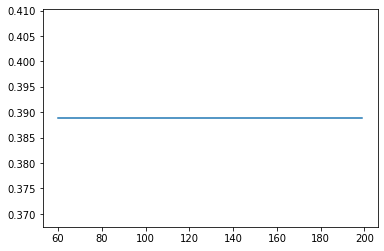

In [82]:
plt.plot(x_test,y_pred6)
pred6 = dt.predict(X_valid)
print('Model score is: ',dt.score(X_train,y_train))
print('R2 score for decision tree is: ',dt.score(X_valid,y_valid))
print('MSE for validation set for Decision Tree is: ',mean_squared_error(pred6,y_valid))

Model score is:  0.6131949366629639
R2 score for Random Forest is:  -0.16330432289771069
MSE for validation set for Random Forest is:  0.6218179386504455


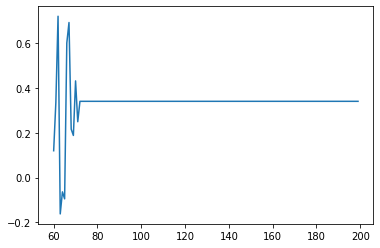

In [83]:
plt.plot(x_test,y_pred7)
pred7 = rf.predict(X_valid)
print('Model score is: ',rf.score(X_train,y_train))
print('R2 score for Random Forest is: ',rf.score(X_valid,y_valid))
print('MSE for validation set for Random Forest is: ',mean_squared_error(pred7,y_valid))

# Gender Wise

In [84]:
### We will create a dictionary of dicionary with 3 keys for gender 0 - male,1 - female, 2- unknown 
### further for each key there is a dctionary with keys as date
### dict_gender is for storing the mean sentiments for each gender for each day
### count_gender is for storing the number of tweets for each gender for each day

dict_gender={0:{},1:{},2:{}}
count_gender={0:{},1:{},2:{}}

In [85]:
for index, row in df.iterrows():
    
    row1=list(row)
    # The 2nd row contains the gender 0 for male 1 for female 2 for third gender
    gender=row1[2]

    dt=row1[0].split('/')
    # our date is in dd/mm/yyyy format  
    d1=date(int(dt[2]),int(dt[1]),int(dt[0]))
    delta=(d1-d0).days
    
    
    if delta in dict_gender[gender]:
      
      # The 4th row contains the number of retweets for each tweet and 2nd last column contains the sentiment
      dict_gender[gender][delta]+=(row1[4]+1)*(row1[col_size-2])
      count_gender[gender][delta]+=(row1[4]+1)
      for j in range(3):
         if j!=gender:
            if delta not in dict_gender[j]:
                dict_gender[j][delta]=0
                count_gender[j][delta]=0
            else:
                dict_gender[j][delta]+=0
                count_gender[j][delta]+=0
    else:
    
      dict_gender[gender][delta]=(row1[4]+1)*(row1[col_size-2])
      count_gender[gender][delta]=(row1[4]+1)
      for j in range(3):
          if j!=gender:
             if delta not in dict_gender[j]:
               dict_gender[j][delta]=0
               count_gender[j][delta]=0
             else:
                dict_gender[j][delta]+=0
                count_gender[j][delta]+=0
        
for i in range(0,3):
  d1=dict_gender[i]
  d2=count_gender[i]
  for key in d1:
    d1[key]/=(d2[key]+1)

 
x_gender=[]
y_gender=[]



In [86]:
for i in range(0,3):
  d=dict_gender[i]
  set = d.keys()
  x11=[]
  y11=[]
  for key in sorted(d.keys()):
    y11.append(d[key])
    ar=[]
    ar.append(key)
    x11.append(ar)
  x_gender.append(x11)
  y_gender.append(y11)


In [87]:
# gujrat not there in data
for i in range(0,3):
  lower_bound = 0.05
  upper_bound = 0.95
  
  y=y_gender[i]
  x=x_gender[i]
  if len(x)!=0:
    data_points = pd.DataFrame(y)
    end_points = data_points[0].quantile([lower_bound,upper_bound])
    indexes = (end_points.loc[lower_bound]<data_points[0].values) & (data_points[0].values<end_points.loc[upper_bound])
    print(i)
    x1 = []
    y1 = []
    # print(i)
    for j in range(len(indexes)):
        if(indexes[j]==True):
            x1.append(x[j])
            y1.append(y[j])
    x_gender[i]=x1
    y_gender[i]=y1

0
1
2


In [88]:
x_gender

[[[0],
  [1],
  [4],
  [6],
  [7],
  [8],
  [9],
  [10],
  [11],
  [12],
  [14],
  [15],
  [16],
  [17],
  [18],
  [19],
  [21],
  [22],
  [23],
  [24],
  [25],
  [26],
  [27],
  [28],
  [29],
  [30],
  [31],
  [32],
  [33],
  [34],
  [35],
  [37],
  [38],
  [39],
  [40],
  [42],
  [43],
  [44],
  [45],
  [46],
  [47],
  [49],
  [50],
  [51],
  [55],
  [56],
  [57],
  [58],
  [59],
  [60],
  [61],
  [62],
  [63],
  [65],
  [66],
  [67],
  [68],
  [70],
  [71],
  [72],
  [73]],
 [[0],
  [1],
  [3],
  [4],
  [5],
  [6],
  [7],
  [8],
  [9],
  [10],
  [11],
  [12],
  [14],
  [15],
  [16],
  [18],
  [20],
  [21],
  [24],
  [25],
  [26],
  [27],
  [29],
  [30],
  [31],
  [32],
  [33],
  [34],
  [35],
  [36],
  [37],
  [38],
  [39],
  [40],
  [41],
  [42],
  [43],
  [44],
  [45],
  [46],
  [47],
  [48],
  [49],
  [50],
  [51],
  [54],
  [55],
  [56],
  [57],
  [58],
  [59],
  [60],
  [61],
  [63],
  [65],
  [66],
  [67],
  [68],
  [70],
  [71],
  [73]],
 []]

In [89]:
x_gender_fin=[]
y_gender_fin=[]
for i in range(0,3):
  for j in range(0,len(x_gender[i])):
    r=x_gender[i][j]
    r.append(i)
    x_gender_fin.append(r)
    y_gender_fin.append(y_gender[i][j])

####  Now x_gender_fin and y_gender_fin is prepared for training 
####  x_gender_fin is of the format [[date,gender]]
####  y_gender_fin contains corresponding prediction for the date and gender given


In [90]:
len(y_gender_fin)

122

In [96]:
y_gender_fin

[0.0,
 0.9,
 0.2727272727272727,
 0.625,
 0.2962962962962963,
 -0.4057971014492754,
 -0.15625,
 0.527536231884058,
 0.0,
 0.07446808510638298,
 0.8888888888888888,
 0.0,
 0.6388888888888888,
 0.5,
 0.34814814814814815,
 0.5714285714285714,
 0.0,
 0.0,
 0.35135135135135137,
 0.0,
 0.0,
 0.6538461538461539,
 0.3953488372093023,
 0.0,
 0.9230769230769231,
 0.0,
 0.14285714285714285,
 0.0,
 0.6363636363636364,
 0.0,
 -0.7368421052631579,
 0.8571428571428571,
 0.0,
 0.8,
 0.3333333333333333,
 -0.14285714285714285,
 0.12121212121212122,
 0.3246753246753247,
 0.8571428571428571,
 0.20588235294117646,
 0.64,
 -0.125,
 -0.05042016806722689,
 0.449438202247191,
 0.6730769230769231,
 0.0,
 0.0,
 0.6,
 -0.75,
 0.09090909090909091,
 0.0,
 0.9166666666666666,
 -0.8,
 0.0,
 0.75,
 0.6875,
 -0.6,
 0.9,
 -0.03571428571428571,
 0.7088607594936709,
 0.5266666666666666,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.6666666666666666,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.037037037037037035,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [91]:
len(x_gender_fin)

122

In [92]:
x_test=[]
for j in range(60,70):
    for k in range(0,3):
        x_test.append([j,k])


In [93]:
x_test

[[60, 0],
 [60, 1],
 [60, 2],
 [61, 0],
 [61, 1],
 [61, 2],
 [62, 0],
 [62, 1],
 [62, 2],
 [63, 0],
 [63, 1],
 [63, 2],
 [64, 0],
 [64, 1],
 [64, 2],
 [65, 0],
 [65, 1],
 [65, 2],
 [66, 0],
 [66, 1],
 [66, 2],
 [67, 0],
 [67, 1],
 [67, 2],
 [68, 0],
 [68, 1],
 [68, 2],
 [69, 0],
 [69, 1],
 [69, 2]]

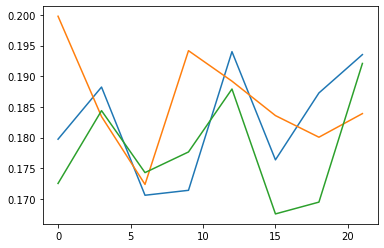

Model score is:  0.0013663847242676441
R2 score of Linar regreesion is:  -0.010868095339287231
MSE of validation set for lin Reg:  0.10163153010698679


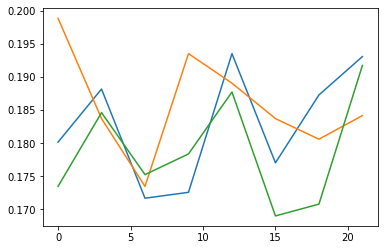

Model score is:  0.0012584975311540347
R2 score of lasso is:  -0.010270860507554325
MSE of validation set for lasso:  0.10157148479537587


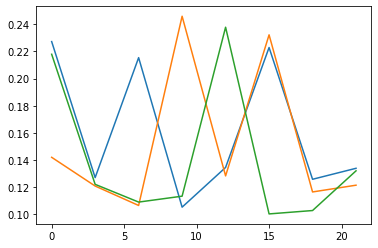

Model score is:  0.023185318770219343
R2 score of ridge is:  0.05562972305521374
MSE of validation set for Ridge:  0.09494591497740718


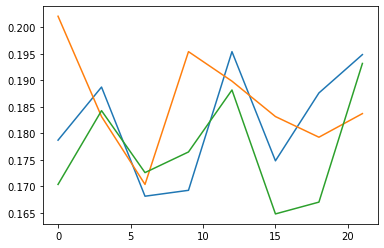

Model score is:  0.0013766551647151906
R2 score for Elastic is:  -0.012637725977526326
MSE of validation set for Elastic Reg is:  0.10180944676131358


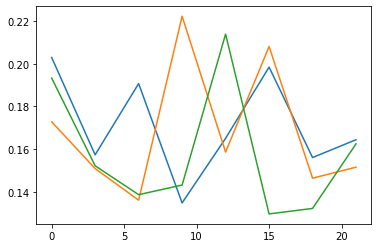

Model score is:  0.018003210059296615
R2 score for bayesian ridge is:  0.02983460762179935
MSE For validation set for bayesian ridge is:  0.0975393265836013


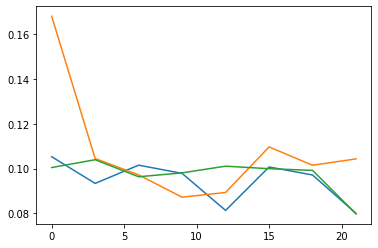

Model score is:  -0.002619557095827618
R2 score for SVR is : -0.10757326814078727
MSE for validation set for SVM is:  0.11135415833750609


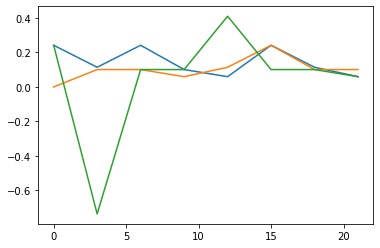

Model score is:  0.4552340520864448
R2 score for decision tree is:  -0.28906670841650883
MSE for validation set for Decision Tree is:  0.12960130267280293


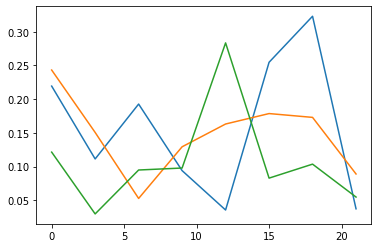

Model score is:  0.49461314924850724
R2 score for Random Forest is:  -0.037215841338029465
MSE for validation set for Random Forest is:  0.10428050256251142


'The models used are:\n1) Linear\n2) Lasso\n3) Ridge\n4) Elastic Net\n5) Bayesian Ridge\n6) SVR\n7) Decision Tree\n8) Random Forest\n'

In [94]:


"""Now no outlier is present in the graph.

# Training and testing on various ML models

The models used are:
1) Linear
2) Lasso
3) Ridge
4) Elastic Net
5) Bayesian Ridge
6) SVR
7) Decision Tree
8) Random Forest
"""

from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(x_gender_fin,y_gender_fin,test_size=0.2)

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,BayesianRidge
alphas = [0.01,0.1,1,5]
max1 = 0
best = 0.1
for alpha in alphas:
    reg = LinearRegression(alpha).fit(X_train, y_train)
    a = reg.score(X_valid,y_valid)
    if(a>max):
        best = alpha
        max1 = a

reg = LinearRegression(best).fit(X_train,y_train)

max2 = 0
best = 0.1
for alpha in alphas:
    reg = Lasso(alpha).fit(X_train, y_train)
    a = reg.score(X_valid,y_valid)
    if(a>max):
        best = alpha
        max2 = a

las = Lasso(best).fit(X_train,y_train)

max3 = 0
best = 0.1
for alpha in alphas:
    reg = Ridge(alpha).fit(X_train, y_train)
    a = reg.score(X_valid,y_valid)
    if(a>max):
        best = alpha
        max3 = a

rid = Ridge(best).fit(X_train,y_train)

max4 = 0
best = 0.1
for alpha in alphas:
    reg = ElasticNet(alpha).fit(X_train, y_train)
    a = reg.score(X_valid,y_valid)
    if(a>max):
        best = alpha
        max4 = a

ela = ElasticNet(best).fit(X_train,y_train)

max5 = 0
best = 1
for alpha in alphas:
    if alpha>=1:
        reg = BayesianRidge(alpha).fit(X_train, y_train)
        a = reg.score(X_valid,y_valid)
        if(a>max):
            best = alpha
            max5 = a

br = BayesianRidge(best).fit(X_train,y_train)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
dt = DecisionTreeRegressor(max_depth=5)
rf = RandomForestRegressor(max_depth=5)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

# plt.scatter(X_valid,y_valid)
# plt.show()

from sklearn.svm import SVR
clf = SVR()
clf.fit(X_train,y_train)



y_pred=reg.predict(x_test)
y_pred1=las.predict(x_test)
y_pred2 = rid.predict(x_test)
y_pred3 = ela.predict(x_test)
y_pred4 = br.predict(x_test)
y_pred5 = clf.predict(x_test)
y_pred6 = dt.predict(x_test)
y_pred7 = rf.predict(x_test)
#y_pred8 = xgb_reg.predict(x_test)
# for k in range(3):
#     xx=[]
#     yy=[]
#     for j in range(0,10): 
#       xx.append(x_test[j][k])
#       yy.append(y_pred[j])
#     plt.plot(xx,yy)
# # plt.legend()
# plt.show()
pred0 = reg.predict(X_valid)
xx1 = []
yy1 = []
yy2 = []
yy3 = []

j = 0 
while(j<len(X_valid)-2):
        xx1.append(j)
        for t in range(3):
            if t==0:
                yy1.append(pred0[j+t])
            elif t==1:
                yy2.append(pred0[j+t])
            else:
                yy3.append(pred0[j+t])
        j+=3

plt.plot(xx1,yy1)
plt.plot(xx1,yy2)
plt.plot(xx1,yy3)
plt.show()

print('Model score is: ',reg.score(X_train,y_train))
print('R2 score of Linar regreesion is: ',reg.score(X_valid,y_valid))
print('MSE of validation set for lin Reg: ',mean_squared_error(pred0,y_valid))



pred1 = las.predict(X_valid)
xx1 = []
yy1 = []
yy2 = []
yy3 = []

j = 0 
while(j<len(X_valid)-2):
        xx1.append(j)
        for t in range(3):
            if t==0:
                yy1.append(pred1[j+t])
            elif t==1:
                yy2.append(pred1[j+t])
            else:
                yy3.append(pred1[j+t])
        j+=3
plt.plot(xx1,yy1)
plt.plot(xx1,yy2)
plt.plot(xx1,yy3)
plt.show()

print('Model score is: ',las.score(X_train,y_train))
print('R2 score of lasso is: ',las.score(X_valid,y_valid))
print('MSE of validation set for lasso: ',mean_squared_error(pred1,y_valid))


pred2 = rid.predict(X_valid)

xx1 = []
yy1 = []
yy2 = []
yy3 = []

j = 0 
while(j<len(X_valid)-2):
        xx1.append(j)
        for t in range(3):
            if t==0:
                yy1.append(pred2[j+t])
            elif t==1:
                yy2.append(pred2[j+t])
            else:
                yy3.append(pred2[j+t])
        j+=3
plt.plot(xx1,yy1)
plt.plot(xx1,yy2)
plt.plot(xx1,yy3)
plt.show()

print('Model score is: ',rid.score(X_train,y_train))
print('R2 score of ridge is: ',rid.score(X_valid,y_valid))
print('MSE of validation set for Ridge: ',mean_squared_error(pred2,y_valid))

pred3 = ela.predict(X_valid)

xx1 = []
yy1 = []
yy2 = []
yy3 = []

j = 0 
while(j<len(X_valid)-2):
        xx1.append(j)
        for t in range(3):
            if t==0:
                yy1.append(pred3[j+t])
            elif t==1:
                yy2.append(pred3[j+t])
            else:
                yy3.append(pred3[j+t])
        j+=3
plt.plot(xx1,yy1)
plt.plot(xx1,yy2)
plt.plot(xx1,yy3)
plt.show()

print('Model score is: ',ela.score(X_train,y_train))
print('R2 score for Elastic is: ',ela.score(X_valid,y_valid))
print('MSE of validation set for Elastic Reg is: ',mean_squared_error(pred3,y_valid))


pred4 = br.predict(X_valid)

xx1 = []
yy1 = []
yy2 = []
yy3 = []

j = 0 
while(j<len(X_valid)-2):
        xx1.append(j)
        for t in range(3):
            if t==0:
                yy1.append(pred4[j+t])
            elif t==1:
                yy2.append(pred4[j+t])
            else:
                yy3.append(pred4[j+t])
        j+=3
plt.plot(xx1,yy1)
plt.plot(xx1,yy2)
plt.plot(xx1,yy3)
plt.show()

print('Model score is: ',br.score(X_train,y_train))
print('R2 score for bayesian ridge is: ',br.score(X_valid,y_valid))
print('MSE For validation set for bayesian ridge is: ',mean_squared_error(pred4,y_valid))

pred5 = clf.predict(X_valid)

xx1 = []
yy1 = []
yy2 = []
yy3 = []

j = 0 
while(j<len(X_valid)-2):
        xx1.append(j)
        for t in range(3):
            if t==0:
                yy1.append(pred5[j+t])
            elif t==1:
                yy2.append(pred5[j+t])
            else:
                yy3.append(pred5[j+t])
        j+=3


plt.plot(xx1,yy1)
plt.plot(xx1,yy2)
plt.plot(xx1,yy3)
plt.show()

print('Model score is: ',clf.score(X_train,y_train))
print('R2 score for SVR is :',clf.score(X_valid,y_valid))
print('MSE for validation set for SVM is: ',mean_squared_error(pred5,y_valid))

pred6 = dt.predict(X_valid)

xx1 = []
yy1 = []
yy2 = []
yy3 = []

j = 0 
while(j<len(X_valid)-2):
        xx1.append(j)
        for t in range(3):
            if t==0:
                yy1.append(pred6[j+t])
            elif t==1:
                yy2.append(pred6[j+t])
            else:
                yy3.append(pred6[j+t])
        j+=3
plt.plot(xx1,yy1)
plt.plot(xx1,yy2)
plt.plot(xx1,yy3)
plt.show()

print('Model score is: ',dt.score(X_train,y_train))
print('R2 score for decision tree is: ',dt.score(X_valid,y_valid))
print('MSE for validation set for Decision Tree is: ',mean_squared_error(pred6,y_valid))

pred7 = rf.predict(X_valid)

xx1 = []
yy1 = []
yy2 = []
yy3 = []

j = 0 
while(j<len(X_valid)-2):
        xx1.append(j)
        for t in range(3):
            if t==0:
                yy1.append(pred7[j+t])
            elif t==1:
                yy2.append(pred7[j+t])
            else:
                yy3.append(pred7[j+t])
        j+=3
        
plt.plot(xx1,yy1)
plt.plot(xx1,yy2)
plt.plot(xx1,yy3)
plt.show()

print('Model score is: ',rf.score(X_train,y_train))
print('R2 score for Random Forest is: ',rf.score(X_valid,y_valid))
print('MSE for validation set for Random Forest is: ',mean_squared_error(pred7,y_valid))

"""# We will use SVR (clf) as it is not very well fitted to the validation set and neither too badly fitted So it will be a good estimator for new Data Points"""



"""The models used are:
1) Linear
2) Lasso
3) Ridge
4) Elastic Net
5) Bayesian Ridge
6) SVR
7) Decision Tree
8) Random Forest
"""



In [95]:
plt.show()

# We will use SVR (clf) as it is not very well fitted to the validation set and neither too badly fitted So it will be a good estimator for new Data Points

# State Wise Prediction

In [ ]:
# top 4 statewise sentiment
# state_index=[1,2,6,29]
dict_state=[]
count_state=[]
for i in range(23):
  dict_state.append({})
  count_state.append({})
# count_state=[{},{},{},{}]

for index, row in df.iterrows():
    # print(row)
    row1=list(row)
    state=row1[len(row1)-1]

      # print(state)
    dt=row1[0].split('/')
    d1=date(int(dt[2]),int(dt[1]),int(dt[0]))
    delta=(d1-d0).days
    # print(dict_state,count_state)
    if delta in dict_state[state]:
      print(row1[col_size-2])
      dict_state[state][delta]+=(row1[4]+1)*(row1[col_size-2])
      count_state[state][delta]+=(row1[4]+1)
    else:
      print(row1[col_size-2])
      dict_state[state][delta]=(row1[4]+1)*(row1[col_size-2])
      count_state[state][delta]=(row1[4]+1)

for i in range(0,23):
  d1=dict_state[i]
  d2=count_state[i]
  for key in d1:
    d1[key]/=d2[key]

x_states=[]
y_states=[]



0
-1
1
0
0
0
1
1
1
-1
0
0
1
-1
0
0
1
1
1
1
0
0
1
0
1
0
-1
0
1
1
0
1
1
1
1
-1
1
1
-1
0
-1
1
0
-1
1
0
1
-1
0
1
-1
-1
1
0
1
1
1
-1
1
1
0
0
0
0
-1
0
0
0
-1
1
1
1
0
1
1
0
0
0
1
1
0
1
-1
0
0
1
-1
-1
0
1
-1
0
1
1
0
-1
1
1
-1
0
-1
-1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
-1
-1
1
0
0
0
1
0
0
-1
1
-1
0
1
1
0
0
0
1
0
0
1
1
1
0
0
1
1
1
1
1
1
1
-1
0
0
1
0
0
0
0
-1
0
1
0
-1
0
1
1
-1
0
0
0
1
0
-1
1
1
0
1
1
0
1
-1
0
0
1
1
-1
0
1
1
1
0
0
0
0
0
1
1
0
1
0
0
0
1
0
-1
1
0
0
0
0
0
1
1
1
0
0
1
0
1
0
1
-1
0
1
-1
1
1
1
-1
1
1
-1
-1
-1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
-1
1
1
1
0
0
0
1
0
0
1
0
-1
0
0
1
0
1
0
0
1
1
0
0
1
1
1
1
1
1
1
-1
0
0
1
0
0
0
0
1
0
-1
0
0
1
0
0
0
1
0
-1
1
1
0
1
1
1
0
1
-1
-1
0
0
1
1
0
0
1
0
1
1
0
0
0
0
0
1
1
-1
0
-1
1
1
0
0
0
0
1
1
1
0
1
1
1
1
1
1
0
-1
0
0
0
-1
1
-1
-1
-1
0
0
1
0
1
-1
0
1
0
1
0
0
1
1
0
0
0
0
-1
0
0
0
-1
1
0
0
0
0
0
1
1
1
0
1
0
1
1
-1
1
-1
0
1
-1
1
1
-1
1
1
-1
-1
-1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
-1
0
0
0
1
0
0
-1
1
-1
0
1
1
0
1
1
0
0
1
1
1
1
1
1
1
-1
0
0
1
0
0
1
0
0
1
0
0
1
1
0
0
0
1
0
-1

In [ ]:
# top 4 statewise sentiment
# state_index=[1,2,6,29]
dict_state=[]
count_state=[]
for i in range(23):
  dict_state.append({})
  count_state.append({})
# count_state=[{},{},{},{}]

for index, row in df.iterrows():
    # print(row)
    row1=list(row)
    state=row1[len(row1)-1]

      # print(state)
    dt=row1[0].split('/')
    d1=date(int(dt[2]),int(dt[1]),int(dt[0]))
    delta=(d1-d0).days
    # print(dict_state,count_state)
    if delta in dict_state[state]:
      print(row1[col_size-2])
      dict_state[state][delta]+=(row1[4]+1)*(row1[col_size-2])
      count_state[state][delta]+=(row1[4]+1)
    else:
      print(row1[col_size-2])
      dict_state[state][delta]=(row1[4]+1)*(row1[col_size-2])
      count_state[state][delta]=(row1[4]+1)

for i in range(0,23):
  d1=dict_state[i]
  d2=count_state[i]
  for key in d1:
    d1[key]/=d2[key]

x_states=[]
y_states=[]



In [ ]:
x_states=[]
y_states=[]
for i in range(0,23):
  d=dict_state[i]
  set = d.keys()
  x11=[]
  y11=[]
  for key in sorted(d.keys()):
    y11.append(d[key])
    ar=[]
    ar.append(key)
    x11.append(ar)
  x_states.append(x11)
  y_states.append(y11)

# x_states
print(x_states)

[[[10], [71]], [[3], [4], [6], [7], [8], [9], [10], [11], [12], [13], [16], [18], [20], [21], [22], [23], [24], [25], [26], [27], [28], [30], [31], [37], [41], [42], [43], [45], [46], [48], [49], [51], [55], [58], [59], [61], [62], [65], [67], [68], [70], [71], [72], [73]], [[1], [6], [7], [8], [10], [12], [13], [14], [16], [17], [18], [19], [21], [23], [25], [26], [27], [28], [31], [32], [33], [34], [35], [36], [37], [39], [40], [41], [42], [43], [45], [46], [47], [48], [49], [50], [51], [54], [55], [56], [57], [58], [59], [63], [66], [67], [70], [71], [72], [73]], [[10], [27], [41], [55], [71], [72], [73]], [[71]], [[5], [7], [12], [18], [19], [22], [23], [26], [27], [31], [38], [43], [44], [50], [70], [72]], [[1], [6], [7], [8], [9], [10], [12], [13], [14], [16], [17], [18], [19], [21], [23], [25], [26], [27], [28], [32], [33], [34], [35], [36], [37], [39], [40], [41], [42], [43], [45], [46], [47], [48], [49], [50], [51], [54], [55], [56], [57], [58], [60], [63], [66], [70], [71], [

In [ ]:
for i in range(0,23):
  lower_bound = 0.05
  upper_bound = 0.95
  
  y=y_states[i]
  x=x_states[i]
  if len(x)!=0:
    data_points = pd.DataFrame(y)
    end_points = data_points[0].quantile([lower_bound,upper_bound])
    indexes = (end_points.loc[lower_bound]<data_points[0].values) & (data_points[0].values<end_points.loc[upper_bound])
    # print(i)
    x1 = []
    y1 = []
    # print(i)
    for j in range(len(indexes)):
        if(indexes[j]==True):
            x1.append(x[j])
            y1.append(y[j])
    x_states[i]=x1
    y_states[i]=y1

print(x_states)

[[], [[6], [7], [8], [10], [11], [12], [21], [22], [23], [24], [25], [27], [30], [41], [43], [48], [51], [55], [58], [61], [65], [68], [71], [72], [73]], [[7], [8], [12], [14], [16], [17], [18], [19], [21], [25], [27], [28], [31], [32], [33], [34], [42], [43], [46], [47], [49], [51], [55], [56], [57], [70], [71], [72], [73]], [], [], [[12], [18], [22], [23], [31], [38], [43], [50], [72]], [[6], [7], [8], [12], [14], [16], [17], [18], [21], [25], [27], [28], [32], [33], [34], [42], [43], [46], [47], [49], [50], [51], [55], [56], [57], [70], [72], [73]], [[5], [6], [7], [12], [15], [22], [23], [26], [34], [40], [42], [43], [45], [46], [60], [61], [67], [70]], [[4], [10], [11], [12], [23], [24], [26], [71]], [], [[18]], [[8], [12], [14], [16], [17], [18], [21], [25], [27], [28], [32], [33], [34], [42], [43], [47], [51], [55], [56], [57], [70], [72], [73]], [], [[21], [22], [60]], [[18], [31], [38], [43]], [], [], [[46], [60]], [], [], [], [[21], [51]], [[8], [14], [16], [17], [18], [21], 

In [ ]:
x_state_fin=[]
y_state_fin=[]
for i in range(0,23):
  for j in range(0,len(x_states[i])):
    r=x_states[i][j]
    r.append(i)
    x_state_fin.append(r)
    y_state_fin.append(y_states[i][j])
# print(len(x_states[0]),len(x_states[1]))
print(len(y_state_fin),len(x_state_fin[0]))


171 2


In [ ]:
len(y_state_fin),x_state_fin[0][1]

(171, 1)

In [ ]:
region=["KL","MH","RJ","KA","GA","MP","UP","GJ","TN","TS","BH","JK","PY","HR","AP","WB","CT","OR","JH","AS","HP","NL","SK","MN","AR","TR","ME","MI","UT","CH","DL"]

[[18, 14], [14, 6], [7, 7], [22, 1], [43, 7], [70, 7], [10, 8], [18, 10], [33, 6], [43, 22], [70, 11], [46, 2], [43, 2], [21, 1], [48, 1], [57, 6], [72, 22], [61, 1], [42, 2], [55, 2], [22, 13], [7, 2], [23, 5], [25, 2], [43, 6], [8, 2], [49, 2], [23, 1], [72, 6], [60, 17], [31, 5], [42, 7], [25, 1], [46, 7], [28, 2], [23, 7], [51, 2], [5, 7], [27, 11], [72, 2], [27, 22], [71, 2], [45, 7], [18, 6], [18, 2], [65, 1], [34, 22], [47, 2], [11, 1], [42, 11], [51, 1], [12, 1], [22, 5], [6, 6], [50, 5], [71, 1], [31, 2], [21, 21], [73, 2], [73, 1], [73, 22], [24, 8], [28, 11], [15, 7], [55, 11], [25, 22], [34, 7], [70, 6], [12, 8], [27, 6], [70, 2], [73, 11], [11, 8], [72, 11], [12, 11], [60, 7], [56, 22], [8, 1], [73, 6], [68, 1], [34, 6], [38, 14], [27, 2], [16, 6], [8, 22], [57, 2], [42, 22], [23, 8], [14, 2], [17, 6], [27, 1], [6, 7], [28, 6], [33, 2], [51, 11], [10, 1], [51, 6], [12, 7], [26, 7], [47, 11], [24, 1], [32, 22], [6, 1], [57, 22], [34, 11], [17, 11], [67, 7], [47, 6], [56, 6]

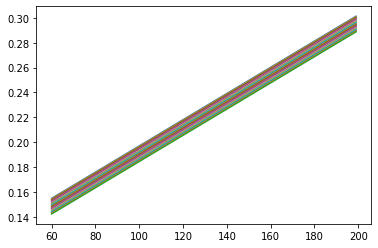

R2 score of Linar regreesion is:  -0.043141997831826595
MSE of validation set for lin Reg:  0.0978735558761801
R2 score of Linar regreesion is:  0.009891427009240063


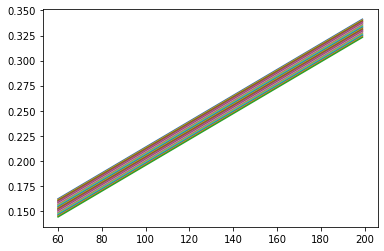

R2 score of lasso is:  -0.04332907023727728
MSE of validation set for lasso:  0.09789110808054521
R2 score of lasso is:  0.011055555462013533


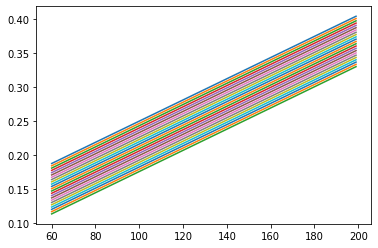

R2 score of ridge is:  -0.04127324374862029
MSE of validation set for Ridge:  0.09769821866651766
R2 score of ridge is:  0.013764294893562012


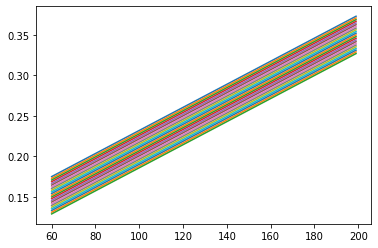

R2 score for Elastic is:  -0.041303057030624535
MSE of validation set for Elastic Reg is:  0.09770101591936355
R2 score for Elastic is:  0.013084356742971814


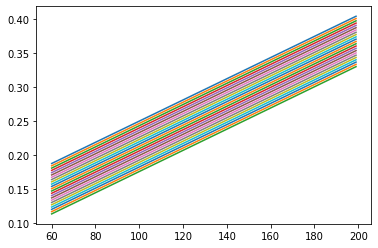

R2 score for bayesian ridge is:  -0.04127324260023979
MSE For validation set for bayesian ridge is:  0.09769821855877003
R2 score for bayesian ridge is:  0.01376429489341602


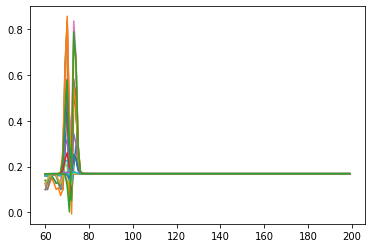

R2 score for SVR is : -0.16169733987763865
MSE for validation set for SVM is:  0.1089970969839662
R2 score for SVR is : 0.825881544359559


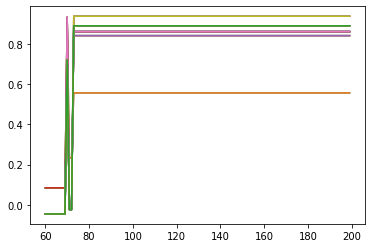

R2 score for decision tree is:  -0.2117496111085868
MSE for validation set for Decision Tree is:  0.1136932876993569
R2 score for decision tree is:  0.5663426741599603


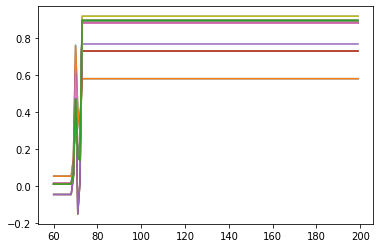

R2 score for Random Forest is:  0.016973617246401007
MSE for validation set for Random Forest is:  0.09223316461246031
R2 score for Random Forest is:  0.6708198466264456


'The models used are:\n1) Linear\n2) Lasso\n3) Ridge\n4) Elastic Net\n5) Bayesian Ridge\n6) SVR\n7) Decision Tree\n8) Random Forest\n'

In [ ]:


"""Now no outlier is present in the graph.

# Training and testing on various ML models

The models used are:
1) Linear
2) Lasso
3) Ridge
4) Elastic Net
5) Bayesian Ridge
6) SVR
7) Decision Tree
8) Random Forest
"""

from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(x_state_fin,y_state_fin,test_size=0.2)

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,BayesianRidge
alphas = [0.01,0.1,1,5]
max1 = 0
best = 0.1
print(X_train)
for alpha in alphas:
    reg = LinearRegression(alpha).fit(X_train, y_train)
    a = reg.score(X_valid,y_valid)
    if(a>max):
        best = alpha
        max1 = a

reg = LinearRegression(best).fit(X_train,y_train)

max2 = 0
best = 0.1
for alpha in alphas:
    reg = Lasso(alpha).fit(X_train, y_train)
    a = reg.score(X_valid,y_valid)
    if(a>max):
        best = alpha
        max2 = a

las = Lasso(best).fit(X_train,y_train)

max3 = 0
best = 0.1
for alpha in alphas:
    reg = Ridge(alpha).fit(X_train, y_train)
    a = reg.score(X_valid,y_valid)
    if(a>max):
        best = alpha
        max3 = a

rid = Ridge(best).fit(X_train,y_train)

max4 = 0
best = 0.1
for alpha in alphas:
    reg = ElasticNet(alpha).fit(X_train, y_train)
    a = reg.score(X_valid,y_valid)
    if(a>max):
        best = alpha
        max4 = a

ela = ElasticNet(best).fit(X_train,y_train)

max5 = 0
best = 1
for alpha in alphas:
    if alpha>=1:
        reg = BayesianRidge(alpha).fit(X_train, y_train)
        a = reg.score(X_valid,y_valid)
        if(a>max):
            best = alpha
            max5 = a

br = BayesianRidge(best).fit(X_train,y_train)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
dt = DecisionTreeRegressor(max_depth=5)
rf = RandomForestRegressor(max_depth=5)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

# plt.scatter(X_valid,y_valid)
# plt.show()

from sklearn.svm import SVR
clf = SVR()
clf.fit(X_train,y_train)

x_test=[]
for k in range(0,23):

  for j in range(60,200):
    x_test.append([j,k])
    
y_pred=reg.predict(x_test)
y_pred1=las.predict(x_test)
y_pred2 = rid.predict(x_test)
y_pred3 = ela.predict(x_test)
y_pred4 = br.predict(x_test)
y_pred5 = clf.predict(x_test)
y_pred6 = dt.predict(x_test)
y_pred7 = rf.predict(x_test)
#y_pred8 = xgb_reg.predict(x_test)
for k in range(0,23):
  
  xx=[]
  yy=[]
  for j in range(k*140,k*140+140): 
    xx.append(x_test[j][0])
    yy.append(y_pred[j])
  plt.plot(xx,yy,label=region[k])
# plt.legend()
plt.show()
pred0 = reg.predict(X_valid)
print('R2 score of Linar regreesion is: ',reg.score(X_valid,y_valid))
print('MSE of validation set for lin Reg: ',mean_squared_error(pred0,y_valid))
print('R2 score of Linar regreesion is: ',reg.score(X_train,y_train))

for k in range(0,23):
  
  xx=[]
  yy=[]
  for j in range(k*140,k*140+140): 
    xx.append(x_test[j][0])
    yy.append(y_pred1[j])
  plt.plot(xx,yy,label=region[k])
# plt.legend()
plt.show()
pred1 = las.predict(X_valid)
print('R2 score of lasso is: ',las.score(X_valid,y_valid))
print('MSE of validation set for lasso: ',mean_squared_error(pred1,y_valid))
print('R2 score of lasso is: ',las.score(X_train,y_train))

for k in range(0,23):
  
  xx=[]
  yy=[]
  for j in range(k*140,k*140+140): 
    xx.append(x_test[j][0])
    yy.append(y_pred2[j])
  plt.plot(xx,yy,label=region[k])
# plt.legend()
plt.show()
pred2 = rid.predict(X_valid)
print('R2 score of ridge is: ',rid.score(X_valid,y_valid))
print('MSE of validation set for Ridge: ',mean_squared_error(pred2,y_valid))
print('R2 score of ridge is: ',rid.score(X_train,y_train))

for k in range(0,23):
  
  xx=[]
  yy=[]
  for j in range(k*140,k*140+140): 
    xx.append(x_test[j][0])
    yy.append(y_pred3[j])
  plt.plot(xx,yy,label=region[k])
# plt.legend()
plt.show()
pred3 = ela.predict(X_valid)
print('R2 score for Elastic is: ',ela.score(X_valid,y_valid))
print('MSE of validation set for Elastic Reg is: ',mean_squared_error(pred3,y_valid))
print('R2 score for Elastic is: ',ela.score(X_train,y_train))

for k in range(0,23):
  
  xx=[]
  yy=[]
  for j in range(k*140,k*140+140): 
    xx.append(x_test[j][0])
    yy.append(y_pred4[j])
  plt.plot(xx,yy,label=region[k])
# plt.legend()
plt.show()
pred4 = br.predict(X_valid)
print('R2 score for bayesian ridge is: ',br.score(X_valid,y_valid))
print('MSE For validation set for bayesian ridge is: ',mean_squared_error(pred4,y_valid))
print('R2 score for bayesian ridge is: ',br.score(X_train,y_train))

for k in range(0,23):
  
  xx=[]
  yy=[]
  for j in range(k*140,k*140+140): 
    xx.append(x_test[j][0])
    yy.append(y_pred5[j])
  plt.plot(xx,yy,label=region[k])
# plt.legend()
plt.show()
pred5 = clf.predict(X_valid)
print('R2 score for SVR is :',clf.score(X_valid,y_valid))
print('MSE for validation set for SVM is: ',mean_squared_error(pred5,y_valid))
print('R2 score for SVR is :',clf.score(X_train,y_train))

for k in range(0,23):
  
  xx=[]
  yy=[]
  for j in range(k*140,k*140+140): 
    xx.append(x_test[j][0])
    yy.append(y_pred6[j])
  plt.plot(xx,yy,label=region[k])
# plt.legend()
plt.show()
pred6 = dt.predict(X_valid)
print('R2 score for decision tree is: ',dt.score(X_valid,y_valid))
print('MSE for validation set for Decision Tree is: ',mean_squared_error(pred6,y_valid))
print('R2 score for decision tree is: ',dt.score(X_train,y_train))

for k in range(0,23):
  
  xx=[]
  yy=[]
  for j in range(k*140,k*140+140): 
    xx.append(x_test[j][0])
    yy.append(y_pred7[j])
  plt.plot(xx,yy,label=region[k])
# plt.legend()
plt.show()
pred7 = rf.predict(X_valid)
print('R2 score for Random Forest is: ',rf.score(X_valid,y_valid))
print('MSE for validation set for Random Forest is: ',mean_squared_error(pred7,y_valid))
print('R2 score for Random Forest is: ',rf.score(X_train,y_train))

"""# We will use SVR (clf) as it is not very well fitted to the validation set and neither too badly fitted So it will be a good estimator for new Data Points"""



"""The models used are:
1) Linear
2) Lasso
3) Ridge
4) Elastic Net
5) Bayesian Ridge
6) SVR
7) Decision Tree
8) Random Forest
"""

